<a href="https://colab.research.google.com/github/N1c-C/Regression/blob/main/Honey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Honey Production Regression**

Deterimine the regression fit for a typical dataset using the sci-kit learn library

## **Dependicies**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
from sklearn import linear_model

# **Dataset**
Load the dataset into a dataframe and view the first few lines

In [2]:
# !wget -O honeyproduction.zip https://www.kaggle.com/datasets/jadaplng/honey-production-in-the-usa-19982021

# Uncomment for CodEcademy
# df = pd.read_csv('http://content.codecademy.com/programs/data-science-path/linear_regression/honeyproduction.csv')

df = pd.read_csv('/content/honeyproduction.csv')
df.head()


,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


# **Get the average production for each year**
Using pandas `groupby()` method

In [3]:
prod_per_year = df.groupby("year").totalprod.mean().reset_index()
prod_per_year

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


Assign the years to the x-axis and productions amount to the y-axis

In [4]:
x = prod_per_year.year
x = x.values.reshape(-1,1)
y=prod_per_year.totalprod.values.reshape(-1,1)

(15, 1)

# **Instantiate the Model and fit the data**

In [47]:
regr = linear_model.LinearRegression()
regr.fit(x,y)

print('Gradient of the slope is: ',regr.coef_[0])
print('The slope intercepts the y=axis at: ',regr.intercept_[0])

Gradient of the slope is:  [-88303.18915238]
The slope intercepts the y=axis at:  181208083.10732976


# **Plot the data and best fit linear function**

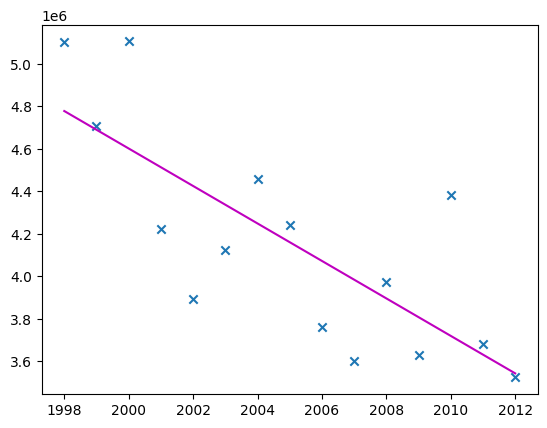

In [20]:
y_predict = regr.predict(x)
plt.scatter(x,y, marker='x')
plt.plot(x,y_predict,'m')
plt.show()

# **Use the model to predict future trends**

In [30]:
x_future = np.array(range(2013,2051))
print(x_future.shape)
print(x_future.reshape(-1,1).shape)
# Reshape takes the row of numbers and rotates to a single column
x_future = x_future.reshape(-1,1)

(38,)
(38, 1)


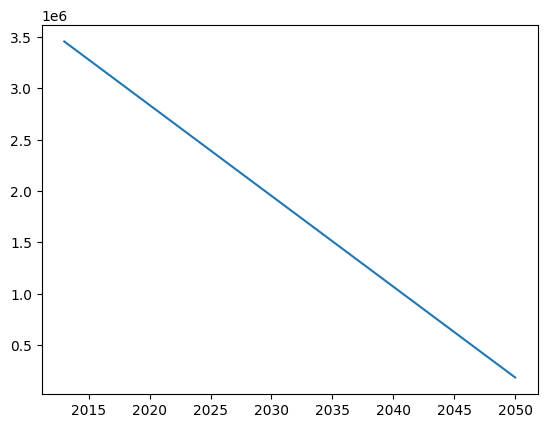

Production in 2050 will be  186545.34


In [46]:
future_predict = regr.predict(x_future)
plt.plot(x_future, future_predict)
plt.show()
print(f'Production in 2050 will be {future_predict[-1][0]: .2f}')